# Robot Navigation Analysis

## Key Findings

The most impactful factors which more likely to make navigations fail are:
* `robot1`, `robot3`, `robot9` in `robot` column
* `customer1`, `customer3` in `customer` column
* `87`, `88` in `code_version` column

The p-values for these values are less than 1%, and we I concluded that these values have effects on success or failure, and their effects are more than just a random chance.

## Exploratory Data Analysis

To better understand the navigation dataset, I focused on each column and look their distribution and patterns in it. Throughout the analysis, `nav_data` stores the robot navigation dataset, and new variables/columns are going to be added to it.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.gridspec as gridspec

In [36]:
nav_data = pd.read_csv("fake_cobalt_nav_data.csv")
nav_data

,robot,customer,start_time,end_time,start_x,start_y,end_x,end_y,distance,code_version,result
0,robot1,customer1,1.647241e+09,1.647242e+09,64.638717,81.218259,94.391697,34.503594,71.522014,87,success
1,robot1,customer1,1.647242e+09,1.647242e+09,20.894658,46.019278,93.809320,70.871689,203.374464,87,failure
2,robot1,customer1,1.647242e+09,1.647243e+09,62.693568,37.715294,71.610633,82.811927,82.220420,87,success
3,robot1,customer1,1.647243e+09,1.647243e+09,47.826350,31.164605,19.253227,6.613513,76.701097,87,success
4,robot1,customer1,1.647243e+09,1.647244e+09,30.294975,6.746561,93.674531,84.885215,304.463385,87,success
...,...,...,...,...,...,...,...,...,...,...,...
39468,robot10,customer8,1.649053e+09,1.649054e+09,62.943801,20.377854,29.829804,31.462586,99.042471,89,success
39469,robot10,customer8,1.649054e+09,1.649054e+09,71.274340,82.225834,65.051888,1.016148,142.993691,89,success
39470,robot10,customer8,1.649054e+09,1.649054e+09,92.644645,8.764296,75.607841,6.707376,39.398163,89,success
39471,robot10,customer8,1.649055e+09,1.649055e+09,39.599108,38.837532,13.104492,23.050032,84.781639,89,success


In [37]:
nav_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39473 entries, 0 to 39472
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   robot         39473 non-null  object 
 1   customer      39473 non-null  object 
 2   start_time    39473 non-null  float64
 3   end_time      39473 non-null  float64
 4   start_x       39473 non-null  float64
 5   start_y       39473 non-null  float64
 6   end_x         39473 non-null  float64
 7   end_y         39473 non-null  float64
 8   distance      39473 non-null  float64
 9   code_version  39473 non-null  int64  
 10  result        39473 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 3.3+ MB


\newpage

## Distribution of Target Variable
Our target variable `result` is highly imbalanced toward success, and only 8% are failures.

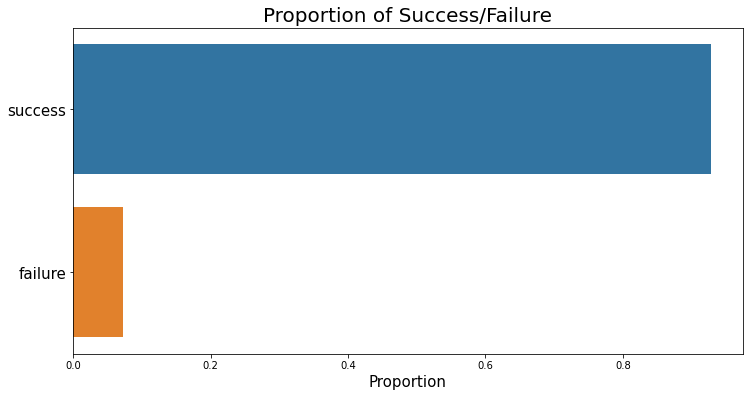

In [38]:
counts = nav_data['result'].value_counts(normalize=True)
labels = counts.index

plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=labels)
plt.xlabel('Proportion',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Proportion of Success/Failure', fontsize=20);

## Distribution of Categorical Variables by Success/Failure

Here, I would investigate distributions for `robot`, `customer`, and `code_version` for success/failure data. Note that they are proportions, not actual counts. There are some labels where failure are higher than success. However, only 8% of our navigation data are failure as comfirmed above.

### Helper Function

`barplot_success_failure` plots barplot for `success` data and another for `failure` data in `result` column.

In [39]:
def barplot_success_failure(df, column):
    """
    Display distribution of categorical variable for success and failure.
    
    Parameters:
        df (pd.DataFrame): dataframe which contains the column variable
        column (str): name of a categorical column to be plot

    Retern:
        None
    """
    
    # get counts of unique values in the column for success and failure
    # if values are string, sort based on the number
    sort_func = None
    if type(df[column].unique()[0]) == str:
        sort_func = lambda index: pd.Index([int(re.findall(r'\d+', label)[0]) for label in list(index)])
    success = nav_data.loc[nav_data['result'] == 'success', column].value_counts(normalize=True).sort_index(key = sort_func)
    failure = nav_data.loc[nav_data['result'] == 'failure', column].value_counts(normalize=True).sort_index(key = sort_func)
    
    indices = success.index # unique values in column
    
    # combine success and failure together
    distributions = pd.DataFrame({column:indices, 'success':success, 'failure':failure})
    melted = distributions.melt(column) # melt dataset for catplot
    
    # plot and format
    sns.catplot(x = column, y='value', hue = 'variable',data=melted, kind='bar', height=7, aspect=1.5)
    plt.xticks(fontsize=12)
    plt.xlabel('Catogory', fontsize=15)
    plt.ylabel('Proportion', fontsize=15)
    plt.title('Distribution of ' + column + ' by Success/Failure', fontsize=20);

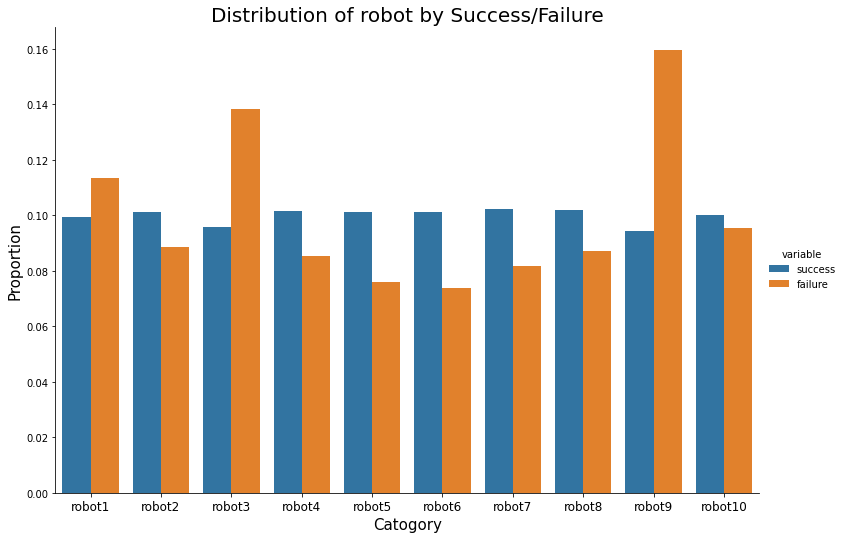

In [40]:
barplot_success_failure(nav_data, 'robot')

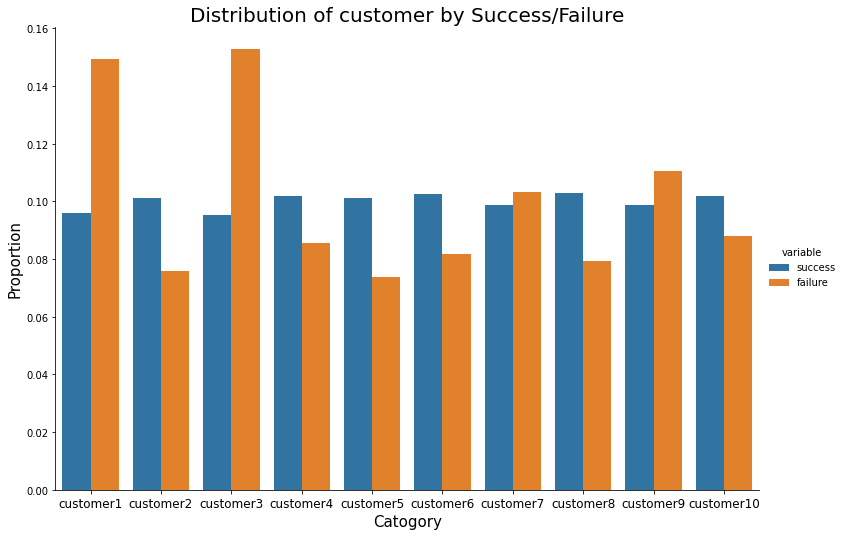

In [41]:
barplot_success_failure(nav_data, 'customer')

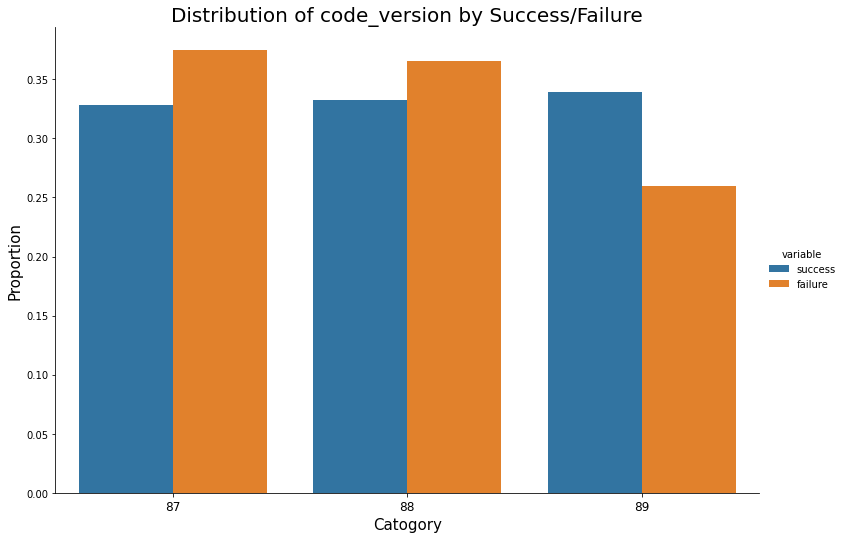

In [42]:
barplot_success_failure(nav_data, 'code_version')

### Findings
1. All of `robot`, `customer`, `code_version` have uniform distributions for successes.
2. Failure, on the other hand, has non-uniform distributions.
3. Following features might make more navigations failure
    * `robot1`, `robot3`, `robot9` in `robot`
    * `customer1`, `customer3` in `customer`
    * `87`, `88` in `code_version`

\newpage

## Distributions of Numerical Variables

Similarly, I would investigate numerical columns: `start_x`, `start_y`, `end_x`, `end_y`, `distance`, `start_time`, `end_time`.

### Helper Function

`hist_success_failure` plots histograms of numerical variables for success and failure vertically

In [43]:
def hist_success_failure(df, columns, dim, title):
    """
    Displays the histogram of continuous columns for success on top and for failure below it.
    
    Parameters:
        df (pd.DataFrame): dataframe which contains the column variable
        columns (list(str)): names of categorical columns to be plot
        dim (tuple(int)): dimension of subplots in the format of (row, col)
        title (str): supertitle of plots
    
    Retern:
        None
    """
    
    # devide dataset by success/failure
    dfs = nav_data[nav_data['result'] == 'success'], nav_data[nav_data['result'] == 'failure']
    subtitles = ['Success', 'Failure'] # subtitle for each column
    
    fig = plt.figure(figsize=(16, dim[0]*6)) # entire figure
    outer = gridspec.GridSpec(dim[0], dim[1], wspace=0.1, hspace=0.23) # divide the figure

    for i in range(dim[0] * dim[1]):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.17) # subfigure

        for j in range(2):
            # sub of subplot
            ax = plt.Subplot(fig, inner[j])
            fig.add_subplot(ax)
            ax.set_xlabel(subtitles[j], fontsize=12) # display success/failure
            
            # format between success/failure
            if j == 0:
                ax.set_title(columns[i], fontsize=17)
                ax.set_xticks([])
                color = 'royalblue'
            else:
                color = 'orangered'
            
            # display histplot
            bins = np.linspace(dfs[j][columns[i]].min(), dfs[j][columns[i]].max(), 16) # divide into 15 bins
            sns.histplot(dfs[j], x = columns[i], bins = bins, color=color, ax = ax)
            
            # format horizontally
            if i % 2 == 1:
                ax.set_ylabel('')
            else:
                ax.set_ylabel('Count', fontsize=12)
            
    fig.suptitle(title, fontsize=20);

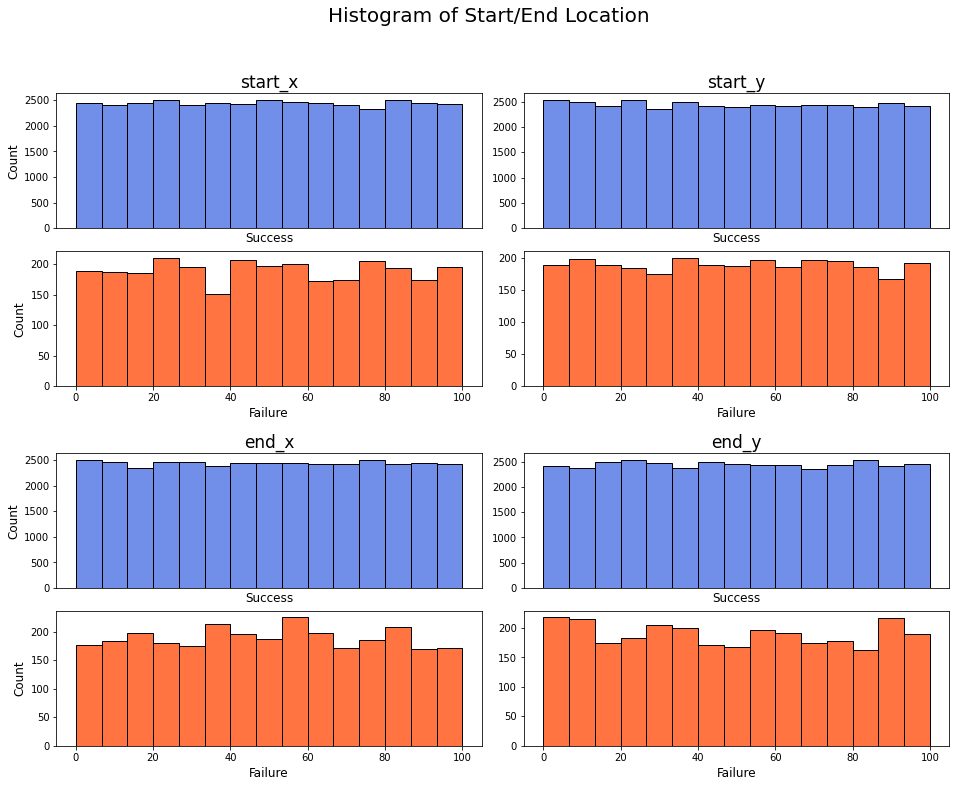

In [44]:
hist_success_failure(nav_data, ['start_x', 'start_y', 'end_x', 'end_y'], (2, 2), 'Histogram of Start/End Location')

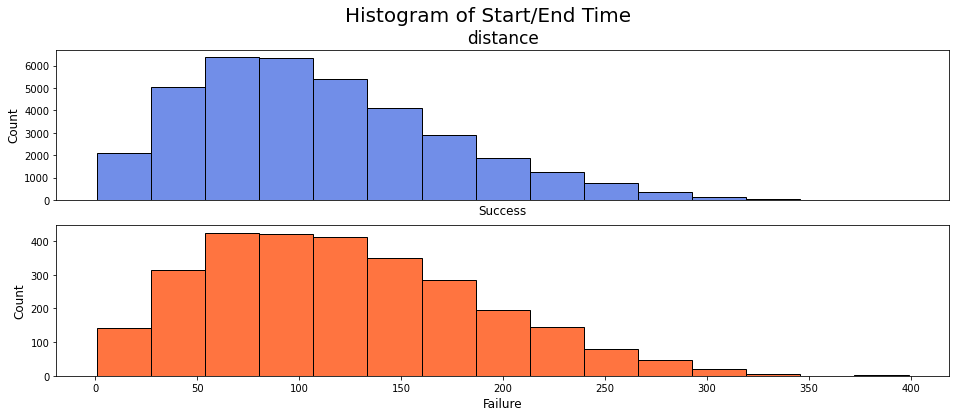

In [45]:
hist_success_failure(nav_data, ['distance'], (1, 1), 'Histogram of Start/End Time')

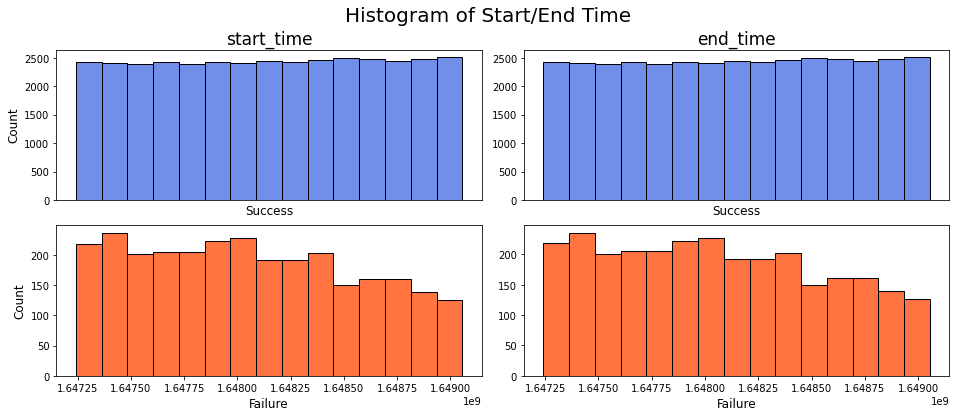

In [46]:
hist_success_failure(nav_data, ['start_time', 'end_time'], (1, 2), 'Histogram of Start/End Time')

### Findings
1. Looking at the plots above, `start_time` and `end_time` seem to have different patterns between successes and failures. As the time goes on, the proportions of failures decreases in our navigation data. Since both seem to have almost identical distributions (especially for failures), I would focus on `start_time` from this point.
2. For other variables, failures' distributions tend to have some bumps, while successes' distributions are flattened. This seems to be due to the small number of failures compared to successes. 

\newpage

## Association Between Code Version and Time
The Plot below shows the range (from min to max) of `start_time` for each `code_version`. Since they are completely not overlapping with each other, `code_version` of robots change all at once. Therefore, instaed of investigating the two strongly associating variables, I would focus on analyzing `code_version` from this point.

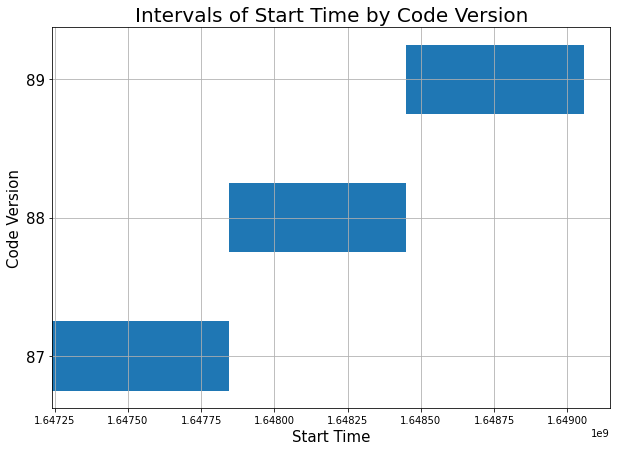

In [47]:
# extract max/min of start_time for each code version
grouped = nav_data.groupby('code_version')['start_time'].agg(['max', 'min'])
start_min, start_max = grouped['min'], grouped['max']

# plot and format
plt.figure(figsize=(10, 7))
plt.barh(y=[87, 88, 89], width=start_max-start_min, left=start_min, height=0.5)
plt.grid(True)
plt.yticks([87, 88, 89], fontsize=15)
plt.xlabel('Start Time', fontsize=15)
plt.ylabel('Code Version', fontsize=15)
plt.title('Intervals of Start Time by Code Version', fontsize=20);

\newpage

## Hypothesis Testing

To check whether the differences in distributions of variables when conditioned on success/failure are because of more than just a randomness, I would conduct three hypothesis testing on each of the three features that seem to have the biggest effect: `robot`, `customer`, `code_version`. Among various methods of hypothesis testing, I choose A/B testing. 

### Hypothesis
* Null hypothesis: The underlying distribution of success/failure is the same whether having features that seem to make more navigations fail or not, and any difference are due to random chance.
* Alternative hypothesis: Navigations with features that seem to make more navigations fail have higher proportions of failure.

### Statistic
The statistic for the testing is the difference of proportion of failures. For example, `customer1` and `customer3` seemed to have bigger affects on making `result` fail than other customers. Call these values treatment values. Now, introduce a new label `customer_treatment`, boolean values, indicating whether a navigation is for either `customer1` or `customer3`. Then, my statistic is the difference of proportions of failures for data points where `customer_treatment == True` and for those where `customer_treatment == False`. When the difference is significantly bigger than 0, that means the proportion of failure is bigger with treatment values, favoring alternative hypothesis.

### Procedure
1. Similar to `customer_treatment` explained above, introduce new labels `robot_treatment` and `code_version_treatment`. 
    * `robot_treatment == True` when a `robot` is any of `robot1`, `robot3`, `robot9`
    * `customer_treatment == True` when a `customer` is either `customer1` or `customer3`
    * `code_version_treatment == True` when a `code_version` is either `87` or `88`
2. Shuffle the treatment labels and calculate the statistic (difference of proportions of failure).
3. Repeat this process 5000 times
4. Reject null hypothesis if p-value is less than 1%. 

### Preprocessing

In [48]:
# boolean labels
nav_data['robot_treatment'] = nav_data['robot'].isin(['robot1', 'robot3', 'robot9'])
nav_data['customer_treatment'] = nav_data['customer'].isin(['customer1', 'customer3'])
nav_data['code_version_treatment'] = nav_data['code_version'].isin([87, 88])

# 1 if failure, 0 if success
nav_data['is_failure'] = (nav_data['result'] == 'failure').astype(int)

### Helper Functions

* `calculate_statistic` calculates the difference of proportion of failure.
* `hypothesis_testing` does the entire process of hypothesis testing of a variable

In [49]:
def calculate_statistic(df, label):
    """
    Calculate the difference of proportions of failure between label is true and false.
    
    Parameters:
        df (pd.DataFrame): dataframe with label and result column
        label (str): name of the boolean column to condition
        
    Return:
        statistic (int): the difference of proportions of failure between navigations with label is true and 
                         those with false.
    """
    
    copy = df.copy()
    means = copy.groupby(label)['is_failure'].mean() # calculate two means
    statistic = means[1] - means[0] # False comes before True alphabetically
    return statistic

def hypothesis_testing(df, label, treatment_values):
    """
    Conduct a hypothesis testing and display the p-value, whether we can reject the null hypothesis, 
    and a histogram of 5000 statistics.
    
    Parameters:
        df (pd.DataFrame): dataframe
        label (str): column name to do hypothesis testing
        treatment_values (list): list of treatment values in the label column
        
    Return:
        None
    """
    
    # Step 1: introduce treatment label
    copy = df.copy()
    treatment_label = label + '_treatment'
    
    observed_statistic = calculate_statistic(copy, treatment_label) # calculate observed statistic
    
    # Step 2, 3: shuffle, calculate statistic, and simulate 5000 times
    simulation_statistics = np.array([])
    for i in range(5000):
        copy['shuffle_treatment'] = np.random.choice(copy[treatment_label], size=len(copy), replace=False) # shuffle the treatment label
        simulation_statistics = np.append(simulation_statistics, calculate_statistic(copy, 'shuffle_treatment'))
    
    # Step 4: calculate p-value and display result
    p_value = sum(simulation_statistics >= observed_statistic) / len(simulation_statistics)
    print(f"Hypothesis Testing: {label}")
    print(f"Observed Statistic: {observed_statistic}")
    print(f"p-value: {p_value}")
    if p_value < 0.01:
        print("p-value is less than 5%, reject the null hypothesis!")
    else:
        print("p-value is bigger than 5%, cannot reject the null hypothesis.")
        
    # display histogram
    plt.figure(figsize=(12, 8))
    sns.histplot(x=simulation_statistics)
    plt.xlabel('Calculated Statistic', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title('Histogram of Calculated Statistics: ' + label, fontsize=20);

Hypothesis Testing: robot
Observed Statistic: 0.0387537453363395
p-value: 0.0
p-value is less than 5%, reject the null hypothesis!


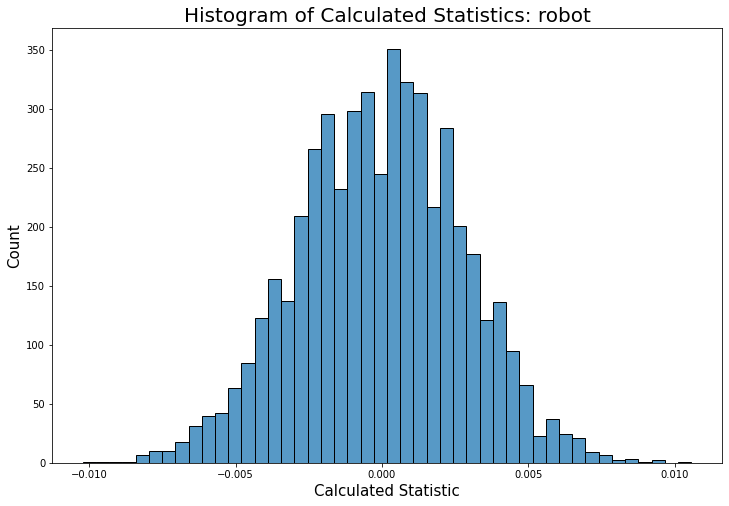

In [54]:
hypothesis_testing(nav_data, 'robot', ['rotbo1', 'robot3', 'robot9'])

Hypothesis Testing: customer
Observed Statistic: 0.04641707574329845
p-value: 0.0
p-value is less than 5%, reject the null hypothesis!


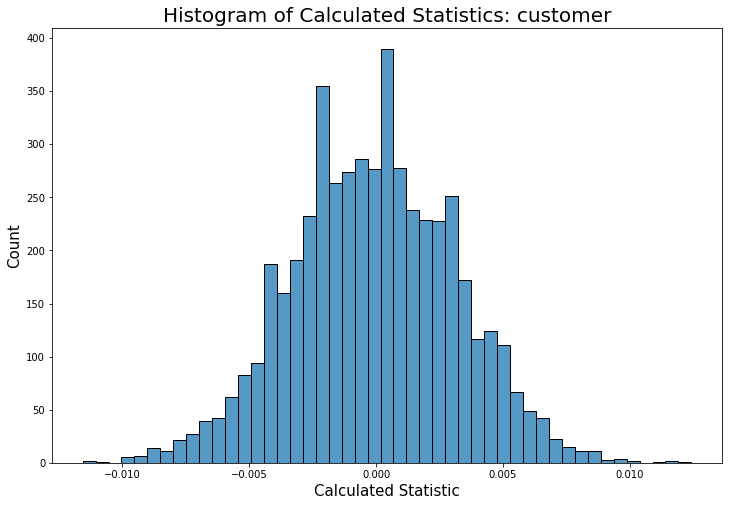

In [51]:
hypothesis_testing(nav_data, 'customer', ['customer1', 'customer3'])

Hypothesis Testing: code_version
Observed Statistic: 0.02395743629675809
p-value: 0.0
p-value is less than 5%, reject the null hypothesis!


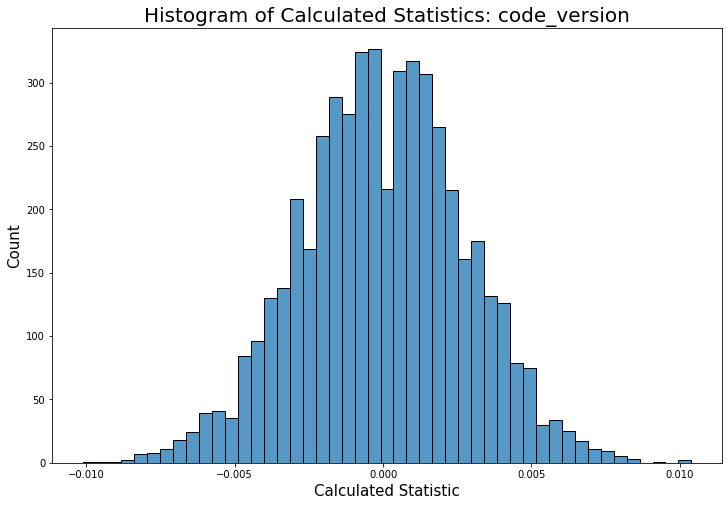

In [52]:
hypothesis_testing(nav_data, 'code_version', [87, 88])

## Result
For all of `robot`, `customer`, `code_version`, the hypothesis testing rejected the null hypothesis, indicating that `robot1`, `robot3`, `robot9` in `robot` column, `customer1`, `customer3` in `customer` column, and `87`, `88` in `code_version` column are likely to have effects on failures. 

Note that the rejection is significantly stronger since our p-values are all zero, meaning there is not a single simulated statistic that exceeds our observed values. Under the null hypothesis, there is almost no chance that the difference in proportions of failure is due to randomness. 